In [23]:
import numpy as np
from numpy.random import randn, rand
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

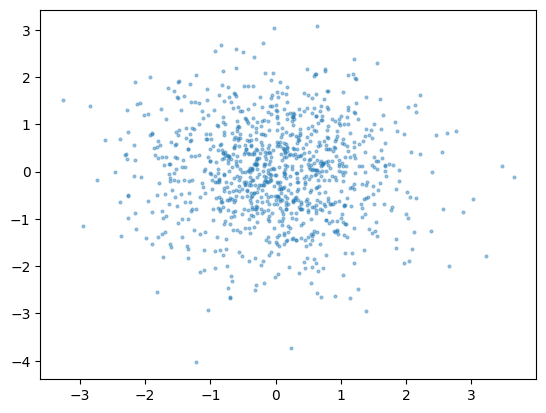

In [4]:
N = 1000
r = 0.0
sigma = np.array([[1, r], [r, 1]])
B = np.linalg.cholesky(sigma)
x = B @ randn(2, N)
plt.scatter([x[0,:]], [x[1,:]], alpha=0.4, s=4)

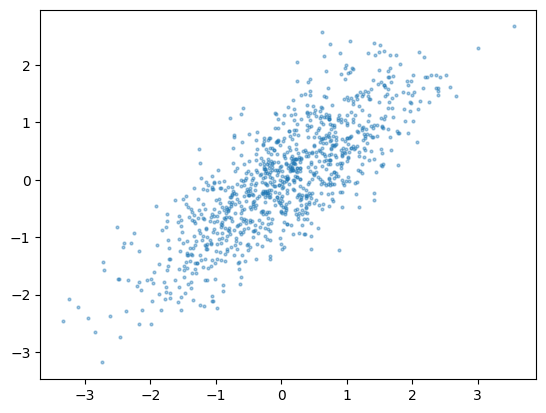

In [5]:
N = 1000
r = 0.8
sigma = np.array([[1, r], [r, 1]])
B = np.linalg.cholesky(sigma)
x = B @ randn(2, N)
plt.scatter([x[0,:]], [x[1,:]], alpha=0.4, s=4)

In [6]:
from math import exp, gamma, log

In [7]:
alpha = 1.3
lam = 5.6
f = lambda x: lam**alpha * x**(alpha-1) * exp(-lam*x)/gamma(alpha)
g = lambda x: 4*exp(-4*x)
C = 1.2
found = False
while not found:
    x = -log(rand())/4
    if C*g(x)*rand() <= f(x):
        found = True
print(x)

0.011582863214667553


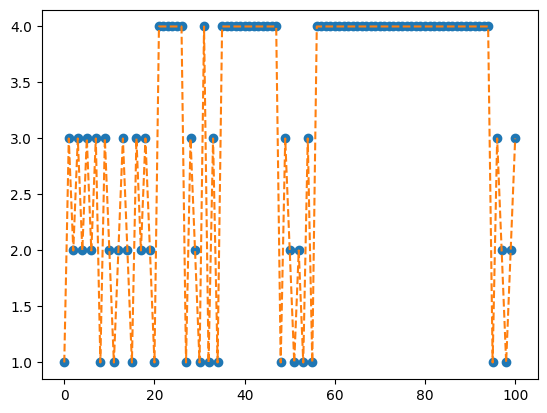

In [8]:
n = 101
P = np.array([[0, 0.2, 0.5, 0.3],
                [0.5, 0, 0.5, 0],
                [0.3, 0.7, 0, 0],
                [0.1, 0, 0, 0.9]])
x = np.array(np.ones(n, dtype=int))
x[0] = 0
for t in range(0, n-1):
    x[t+1] = np.min(np.where(np.cumsum(P[x[t], :]) > np.random.rand()))
x = x + 1
plt.plot(np.array(range(0, n)), x, 'o')
plt.plot(np.array(range(0, n)), x, '--')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

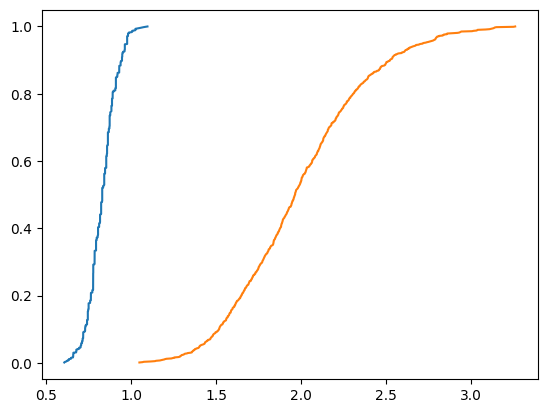

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF

np.random.seed(9)
n = 100
N = 1000
x = np.random.rand(n)/np.random.rand(n)

med = np.zeros(N)
ave = np.zeros(N)
for i in range(0, N):
    s = np.random.choice(x, n, replace=True)
    med[i] = np.median(s)
    ave[i] = np.mean(s)
    
med_cdf = ECDF(med)
ave_cdf = ECDF(ave)

plt.plot(med_cdf.x, med_cdf.y)
plt.plot(ave_cdf.x, ave_cdf.y)
plt.show

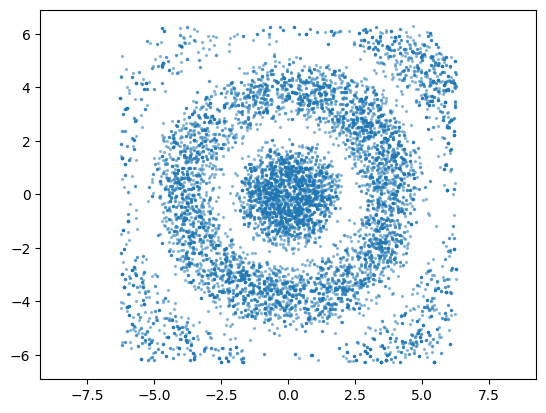

In [10]:
N = 10000
a = lambda x: -2*np.pi < x
b = lambda x: x < 2*np.pi
f = lambda x1, x2 : np.exp(-np.sqrt(x1**2+x2**2)/4)*(np.sin(2*np.sqrt(x1**2+x2**2))+1)*a(x1)*b(x1)*a(x2)*b(x2)

xx = np.zeros((N, 2))
x = np.zeros((1,2))
for i in range(1, N):
    y = x + np.random.randn(1,2)
    alpha = np.amin((f(y[0][0], y[0][1])/f(x[0][0], x[0][1]), 1))
    r = rand() < alpha
    x = r*y + (1-r)*x
    xx[i, :] = x
    
plt.scatter(xx[:, 0], xx[:, 1], alpha=0.4, s=2)
plt.axis('equal')
plt.show()

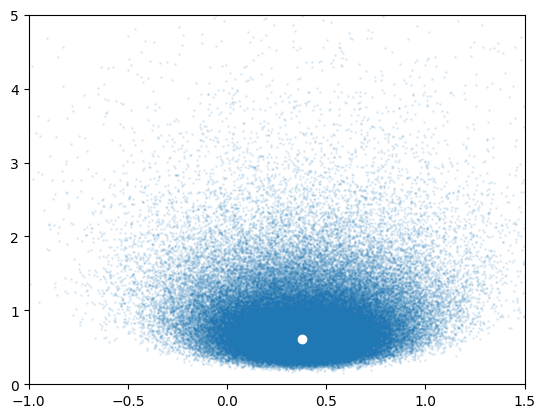

In [11]:
x = np.array([[-0.9472, 0.5401, -0.2166, 1.1890, 1.3170,
               -0.4056, -0.4449, 1.3284, 0.8338, 0.6044]])

n = x.size
sample_mean = np.mean(x)
sample_var = np.var(x)
sig2 = np.var(x)
mu = sample_mean

N = 10**5
gibbs_sample = np.array(np.zeros((N, 2)))
for k in range(N):
    mu = sample_mean + np.sqrt(sig2/n)*np.random.randn()
    V = np.sum((x-mu)**2)/2
    sig2 = 1/np.random.gamma(n/2, 1/V)
    gibbs_sample[k, :] = np.array([mu, sig2])
    
plt.scatter(gibbs_sample[:, 0], gibbs_sample[:, 1], alpha=0.1, s=1)
plt.plot(np.mean(x), np.var(x), 'wo')
plt.ylim([0, 5])
plt.xlim([-1, 1.5])
plt.show()

In [14]:
c = (2/np.pi)**(3/2)
H = lambda x: c*np.sqrt(np.abs(np.sum(x, axis=1)))
N = 10**6
z = 1.96
x = np.random.randn(N, 3)
y = H(x)
mY = np.mean(y)
sY = np.std(y)
RE = sY/mY/np.sqrt(N)
print('Estimate = {:3.3f}, CI = ({:3.3f}, {:3.3f})'.format(mY, mY*(1-z*RE), mY*(1+z*RE)))

Estimate = 0.550, CI = (0.550, 0.550)


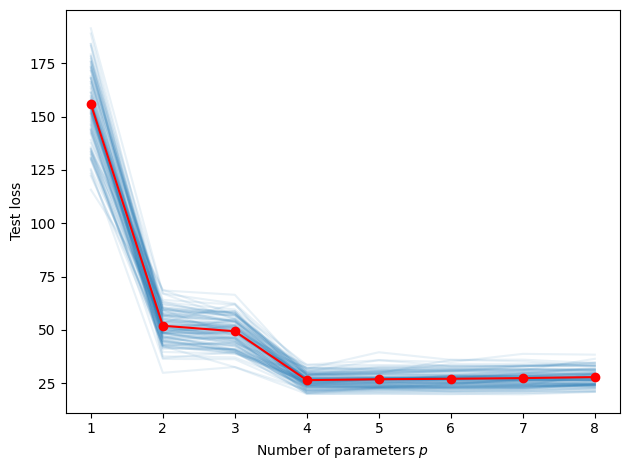

In [17]:
def generate_data(beta, sig, n):
    u = rand(n, 1)
    y = (u ** np.arange(0, 4)) @ beta + sig * randn(n, 1)
    return u, y

beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
betahat = {}
totMSE = np.zeros(8)
max_P = 8
p_range = np.arange(1, max_P + 1, 1)

for N in range(0, 100):
    u, y = generate_data(beta, sig, n)
    X = np.ones((n, 1))
    for p in p_range:
        if p > 1:
            X = np.hstack((X, u**(p-1)))
        betahat[p] = np.linalg.solve(X.T @ X, X.T @ y)
        
    u_test, y_test = generate_data(beta, sig, n)
    MSE = []
    X_test = np.ones((n, 1))
    for p in p_range:
        if p > 1:
            X_test = np.hstack((X_test, u_test**(p-1)))
        y_hat = X_test @ betahat[p]
        MSE.append(np.sum((y_test - y_hat)**2/n))
        
    totMSE = totMSE + np.array(MSE)
    plt.plot(p_range, MSE, 'C0', alpha=0.1)
    
plt.plot(p_range,totMSE/N,'r-o')
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.ylabel('Test loss')
plt.tight_layout()
plt.show()

In [20]:
import seaborn as sns
from numba import jit

/tmp/ipykernel_25135/257021747.py:12: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "generate_cyclereward" failed type inference due to: No implementation of function Function(<function amin at 0x7f72d24a5430>) found for signature:
 
 >>> amin(UniTuple(array(int64, 1d, C) x 1))
 
There are 4 candidate implementations:
      - Of which 4 did not match due to:
      Overload of function 'amin': File: <numerous>: Line N/A.
        With argument(s): '(UniTuple(array(int64, 1d, C) x 1))':
       No match.

During: resolving callee type: Function(<function amin at 0x7f72d24a5430>)
During: typing of call at /tmp/ipykernel_25135/257021747.py (22)


File "../../../../../../../../tmp/ipykernel_25135/257021747.py", line 22:
<source missing, REPL/exec in use?>

  @jit()
/tmp/ipykernel_25135/257021747.py:12: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "generate_cyclereward" failed type i

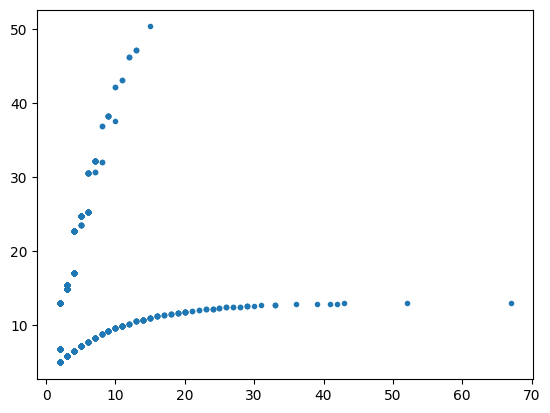

/tmp/ipykernel_25135/257021747.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(A.flatten(),shade=True)


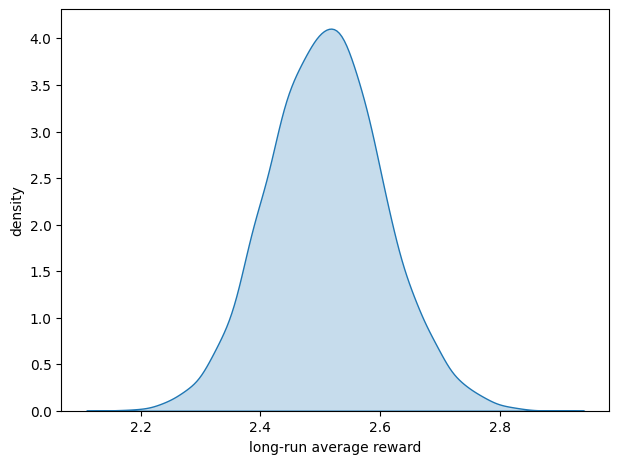

In [24]:
np.random.seed(123)
n = 1000
P = np.array([[0, 0.2, 0.5, 0.3],
              [0.5 ,0, 0.5, 0],
              [0.3, 0.7, 0, 0],
              [0.1, 0, 0, 0.9]])
r = np.array([4,3,10,1])
Corg = np.array(np.zeros((n,1)))
Rorg = np.array(np.zeros((n,1)))
rho=0.9

@jit()
def generate_cyclereward(n):
    for i in range(n):
        t = 1
        xreg = 1
        reward = r[0]
        x = np.amin(np.argwhere(np.cumsum(P[xreg-1, :]) > np.random.rand())) + 1
        while x != xreg:
            t += 1
            reward += rho**(t-1)*r[x-1]
            x = np.amin(np.where(np.cumsum(P[x-1, :]) > np.random.rand())) + 1
        Corg[i] = t
        Rorg[i] = reward
    return Corg, Rorg

Corg, Rorg = generate_cyclereward(n)

plt.plot(Corg,Rorg,'.')
plt.show()

Aorg = np.mean(Rorg)/np.mean(Corg)
K = 5000
A = np.array(np.zeros((K,1)))
C = np.array(np.zeros((n,1)))
R = np.array(np.zeros((n,1)))
for i in range(K):
    ind = np.ceil(n*np.random.rand(1,n)).astype(int)[0]-1
    C = Corg[ind]
    R = Rorg[ind]
    A[i] = np.mean(R)/np.mean(C)
    
plt.tight_layout()
plt.xlabel('long-run average reward')
plt.ylabel('density')
plt.tight_layout()
plt.savefig('MSErepeatpy.pdf',format='pdf')
sns.kdeplot(A.flatten(),shade=True)   
plt.savefig('CRresamplingpy.pdf',format='pdf')
plt.show()